## we compare EXP2 with a silly model

D:\SOFTWARE\ANACONDA\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


(array([1.56512e+05, 6.68070e+04, 1.42050e+04, 1.00180e+04, 2.74900e+03,
        3.41000e+02, 1.53000e+02, 7.10000e+01, 4.80000e+01, 9.60000e+01]),
 array([1.5258284e-05, 2.0001373e-01, 4.0001220e-01, 6.0001069e-01,
        8.0000913e-01, 1.0000076e+00, 1.2000061e+00, 1.4000046e+00,
        1.6000030e+00, 1.8000015e+00, 2.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

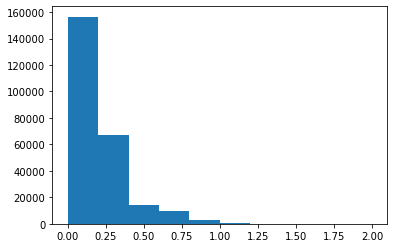

In [2]:
import AssortmentGenerator as AG
import MarkovGenerator as MG
import Models
import time

import numpy as np
import torch
import torch.nn as nn

from torch import optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

N_prod = 250        # number of products
Vec_Len = N_prod + 1
Neck_Len = 30       # bottle neck width
SAMPLE_AMOUNT = 1000


transP = np.load("EXP2_dump/markov_matrix.npy")
lams = np.load("EXP2_dump/arriving_lambda.npy")

model = torch.load("EXP2_dump/bottleneck_model.pth")

# generate synthetic data
INPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
for i in range(SAMPLE_AMOUNT):
    assort = AG.GenAssortment_Sparse(N_prod)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)
    
INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.l1_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1/Vec_Len)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max=2).detach().numpy()

plt.hist(losses)

## Dense

(array([110553., 111226., 105057.,  73255.,  40676.,  15793.,  10188.,
          6892.,   4828.,  23532.]),
 array([1.2272503e-06, 2.0000111e-01, 4.0000099e-01, 6.0000086e-01,
        8.0000073e-01, 1.0000006e+00, 1.2000005e+00, 1.4000003e+00,
        1.6000003e+00, 1.8000001e+00, 2.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

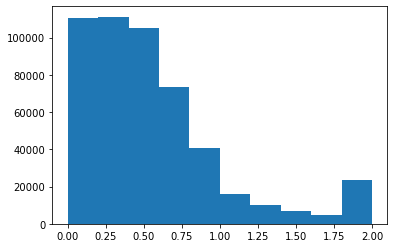

In [6]:
DENSE_AMOUNT = 2000


INPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
for i in range(DENSE_AMOUNT):
    assort = AG.GenAssortment_Fixed(N_prod, fixed_num = N_prod-1)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)


INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = model(INPUT)

RELATIVE_LOSS = nn.functional.l1_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1/Vec_Len)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max=2).detach().numpy()

plt.hist(losses)

## Silly model

(array([114508.,  95981.,  85374.,  75620.,  66492.,  22420.,  16989.,
         12297.,   8749.,   3570.]),
 array([1.8116552e-06, 2.0000163e-01, 4.0000144e-01, 6.0000128e-01,
        8.0000108e-01, 1.0000010e+00, 1.2000008e+00, 1.4000006e+00,
        1.6000004e+00, 1.8000002e+00, 2.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

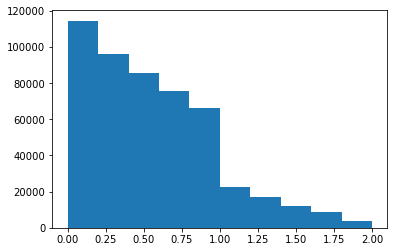

In [8]:
INPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((DENSE_AMOUNT,Vec_Len))
for i in range(DENSE_AMOUNT):
    assort = AG.GenAssortment_Fixed(N_prod, fixed_num = N_prod-1)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)


INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = Models.SillyModel(INPUT)

RELATIVE_LOSS = nn.functional.l1_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1/Vec_Len)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max=2).detach().numpy()

plt.hist(losses)

(array([23548., 23659., 25001., 29628., 31951., 23600., 23415., 23667.,
        23713., 22818.]),
 array([2.2528922e-05, 2.0002028e-01, 4.0001804e-01, 6.0001576e-01,
        8.0001354e-01, 1.0000112e+00, 1.2000090e+00, 1.4000068e+00,
        1.6000046e+00, 1.8000022e+00, 2.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

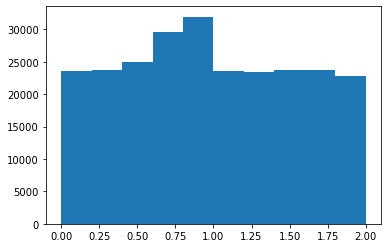

In [5]:
# generate synthetic data
INPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
OUTPUT = np.zeros((SAMPLE_AMOUNT,Vec_Len))
for i in range(SAMPLE_AMOUNT):
    assort = AG.GenAssortment_Sparse(N_prod)    
    INPUT[i] = AG.Product_0(assort)
    OUTPUT[i] = MG.Absorbing_Calculator(lams, transP, assort)
    
INPUT=torch.Tensor(INPUT)
OUTPUT = torch.Tensor(OUTPUT)

MODEL_OUT = Models.SillyModel(INPUT)

RELATIVE_LOSS = nn.functional.l1_loss(OUTPUT, MODEL_OUT, size_average=False, reduce = False, reduction = None) / torch.clamp(OUTPUT, min = 1/Vec_Len)

losses = torch.clamp(torch.reshape(RELATIVE_LOSS,(-1,)), max=2).detach().numpy()

plt.hist(losses)